# Imports

In [85]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#From Scikit Learn
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

In [86]:
%pwd

'C:\\Users\\JM025575\\Predictive Models Class\\data'

In [87]:
cd /Users/JM025575/Predictive Models Class/data

C:\Users\JM025575\Predictive Models Class\data


# Import Data

In [88]:
churn = pd.read_csv("Churn_Calls.csv", sep=",")
#print type of object for target
print("Data type", churn.area_code.dtype)
#Dimensions of dataset
print("Shape of Data", churn.shape)
#Colum names
print("Colums Names", churn.columns)
#See top few rows of dataset
churn.head(10)

Data type object
Shape of Data (5000, 20)
Colums Names Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,AK,1,area_code_408,no,no,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1,no
1,AK,36,area_code_408,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,no
2,AK,36,area_code_415,yes,yes,19,171.9,96,29.22,198.4,111,16.86,321.7,76,14.48,10.5,1,2.84,1,yes
3,AK,41,area_code_415,no,no,0,159.3,66,27.08,125.9,75,10.70,261.9,76,11.79,11.1,5,3.00,1,no
4,AK,42,area_code_415,no,no,0,171.0,129,29.07,183.9,96,15.63,130.2,90,5.86,4.6,6,1.24,0,no
5,AK,48,area_code_415,no,yes,37,211.7,115,35.99,159.9,84,13.59,144.1,80,6.48,12.2,1,3.29,1,no
6,AK,50,area_code_408,no,no,0,183.6,107,31.21,58.6,118,4.98,202.6,99,9.12,8.7,3,2.35,1,no
7,AK,51,area_code_510,yes,yes,12,135.8,60,23.09,200.6,134,17.05,192.4,98,8.66,12.3,7,3.32,2,no
8,AK,52,area_code_408,no,no,0,217.0,104,36.89,152.3,83,12.95,134.3,109,6.04,11.8,4,3.19,2,no
9,AK,52,area_code_415,no,yes,24,170.9,71,29.05,201.4,80,17.12,159.0,124,7.15,4.1,5,1.11,2,no


# Identify Target Variable and Move to Target to Collumn 0

In [90]:
# designate target variable name and move the target variable of 'churn' to my first column for easier use.
targetName = 'churn'
targetSeries = churn[targetName]
#remove target from current location and insert in collum 0
del churn[targetName]
churn.insert(0, targetName, targetSeries)
#reprint dataframe and see target is in position 0
churn.head()

,churn,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,no,AK,1,area_code_408,no,no,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1
1,no,AK,36,area_code_408,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0
2,yes,AK,36,area_code_415,yes,yes,19,171.9,96,29.22,198.4,111,16.86,321.7,76,14.48,10.5,1,2.84,1
3,no,AK,41,area_code_415,no,no,0,159.3,66,27.08,125.9,75,10.70,261.9,76,11.79,11.1,5,3.00,1
4,no,AK,42,area_code_415,no,no,0,171.0,129,29.07,183.9,96,15.63,130.2,90,5.86,4.6,6,1.24,0


In [91]:
#dropping columns I do not believe will contribute to a strong prediction
churn = churn.drop(['state', 'area_code'], axis = 1)

In [92]:
churn.head()

,churn,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,no,1,no,no,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1
1,no,36,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0
2,yes,36,yes,yes,19,171.9,96,29.22,198.4,111,16.86,321.7,76,14.48,10.5,1,2.84,1
3,no,41,no,no,0,159.3,66,27.08,125.9,75,10.70,261.9,76,11.79,11.1,5,3.00,1
4,no,42,no,no,0,171.0,129,29.07,183.9,96,15.63,130.2,90,5.86,4.6,6,1.24,0


# EDA

In [93]:
#Finding the mean value of every numeric feature
churn.mean()

account_length                   100.258600
number_vmail_messages              7.755200
total_day_minutes                180.288900
total_day_calls                  100.029400
total_day_charge                  30.649668
total_eve_minutes                200.636560
total_eve_calls                  100.191000
total_eve_charge                  17.054322
total_night_minutes              200.391620
total_night_calls                 99.919200
total_night_charge                 9.017732
total_intl_minutes                10.261780
total_intl_calls                   4.435200
total_intl_charge                  2.771196
number_customer_service_calls      1.570400
dtype: float64

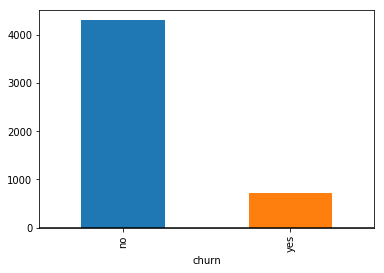

In [94]:
#Reviewing my target variable to see whether or not my yes and no results make for a balanced data set.
groupby = churn.groupby(targetName)
targetEDA=groupby[targetName].aggregate(len)
plt.figure()
targetEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')
#majority of customers are not churning, very unbalanced data in terms of the number of yes and no answers which could impact the analysis.

In [95]:
#Reviewing the standard deviation of all numeric variables
churn.std()

account_length                   39.694560
number_vmail_messages            13.546393
total_day_minutes                53.894699
total_day_calls                  19.831197
total_day_charge                  9.162069
total_eve_minutes                50.551309
total_eve_calls                  19.826496
total_eve_charge                  4.296843
total_night_minutes              50.527789
total_night_calls                19.958686
total_night_charge                2.273763
total_intl_minutes                2.761396
total_intl_calls                  2.456788
total_intl_charge                 0.745514
number_customer_service_calls     1.306363
dtype: float64

In [66]:
churn.columns.tolist()

['churn',
 'account_length',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

In [67]:
churn.groupby('international_plan').size() #most people do not have an international plan

international_plan
no     4527
yes     473
dtype: int64

In [96]:
churn.groupby('voice_mail_plan').size()  #most people do not have a voicemail plan

voice_mail_plan
no     3677
yes    1323
dtype: int64

# Preprocessing Data

In [97]:
# This code turns a text target into numeric to some scikit learn alogrythms can process it.  This makes my churn feature have 1 and 0 results
from sklearn import preprocessing
le_dep = preprocessing.LabelEncoder()  #takes yes and no and makes 1 and 0
#to convert into numbers
churn['churn'] = le_dep.fit_transform(churn['churn'])

In [98]:
# perform data transformation. Creates dummies of any categorical feature as new columns with 1 or 0 as their results
for col in churn.columns[1:]:
	attName = col
	dType = churn[col].dtype
	missing = pd.isnull(churn[col]).any()
	uniqueCount = len(churn[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		churn = pd.concat([churn, pd.get_dummies(churn[col], prefix=col)], axis=1)
		del churn[attName]

In [99]:
churn.shape

(5000, 20)

In [100]:
churn.head()

,churn,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,0,1,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1,1,0,1,0
1,0,36,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,1,0,0,1
2,1,36,19,171.9,96,29.22,198.4,111,16.86,321.7,76,14.48,10.5,1,2.84,1,0,1,0,1
3,0,41,0,159.3,66,27.08,125.9,75,10.70,261.9,76,11.79,11.1,5,3.00,1,1,0,1,0
4,0,42,0,171.0,129,29.07,183.9,96,15.63,130.2,90,5.86,4.6,6,1.24,0,1,0,1,0


# Randomly split your dataset into Train/Test 

In [101]:
# split dataset into testing and training, creating 4 new objects here. Separating out features from target.  Creating a split of 33/67 for test vs train.
features_train, features_test, target_train, target_test = train_test_split(
    churn.iloc[:,1:].values, churn.iloc[:,0].values, test_size=0.33, random_state=0)

## Four new train/test files and their shapes. 

In [102]:
print(features_test.shape)
print(features_train.shape)
print(target_test.shape)
print(target_train.shape)

(1650, 19)
(3350, 19)
(1650,)
(3350,)


# Decision Tree

## Basic Decision Tree

In [75]:
from sklearn import tree 
clf_dt = tree.DecisionTreeClassifier() #taking out of box options. 
#Call up the model to see the parameters you can tune (and their default setting)
print(clf_dt)
#Fit clf to the training data
clf_dt = clf_dt.fit(features_train, target_train) #feeding 2 separate data frames like this
#Predict clf DT model again test data
target_predicted_dt = clf_dt.predict(features_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


### Model Accuracy

In [76]:
print("DT Accuracy Score", accuracy_score(target_test, target_predicted_dt))
print(classification_report(target_test, target_predicted_dt))
print(confusion_matrix(target_test, target_predicted_dt))

DT Accuracy Score 0.9218181818181819
             precision    recall  f1-score   support

          0       0.96      0.95      0.95      1413
          1       0.72      0.74      0.73       237

avg / total       0.92      0.92      0.92      1650

[[1345   68]
 [  61  176]]


### Cross Validate Basic Model

In [77]:
#verify DT with Cross Validation
scores = cross_val_score(clf_dt, features_train, target_train, cv=10)  #it is sampling from each of the data sets, usually sampling 50% out of each
print("Cross Validation Score for each K",scores)
scores.mean()    

Cross Validation Score for each K [0.91641791 0.91343284 0.91044776 0.93731343 0.92238806 0.91343284
 0.90447761 0.90746269 0.94328358 0.89253731]


0.9161194029850745

After running the basic model with no additional parameters changed from the default we get a model accuracy score of 0.9218.  To get there, I created train and test data sets with a 67/33 split.  I then set up the basic decision tree model, which I called clf_dt, with no parameters set.  I fed the model my train data, and then used the decision tree predict function to use my model on the test data.  Next I calculated the accuracy, precision, and recall for the predictions.  As noted before, the accuracy was 0.9218, while the precision for my 'yes' answers was 0.72 and my recall was 0.74, meaning I got 74% of my yes answers correct but I only meant it 72% (precision)of the time.  Finally I did cross validation 10 times and ended up with an average of 0.9161.

## Decision Tree Two Parameters Adjusted

In [78]:
clf_dt_v2 = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = 'random') #
#Fit clfv2 to the training data
clf_dt_v2 = clf_dt_v2.fit(features_train, target_train) #feeding 2 separate data frames like this
#Predict clf DT model again test data
target_predicted_dt = clf_dt_v2.predict(features_test)

### Model Accuracy

In [79]:
print("DT Accuracy Score", accuracy_score(target_test, target_predicted_dt))
print(classification_report(target_test, target_predicted_dt))
print(confusion_matrix(target_test, target_predicted_dt))

DT Accuracy Score 0.9103030303030303
             precision    recall  f1-score   support

          0       0.95      0.95      0.95      1413
          1       0.69      0.68      0.69       237

avg / total       0.91      0.91      0.91      1650

[[1340   73]
 [  75  162]]


### Cross Validate Basic Model

In [80]:
#verify DT with Cross Validation
scores = cross_val_score(clf_dt, features_train, target_train, cv=10)  #it is sampling from each of the data sets, usually sampling 50% out of each
print("Cross Validation Score for each K",scores)
scores.mean()    

Cross Validation Score for each K [0.91343284 0.90746269 0.91044776 0.93432836 0.92238806 0.91641791
 0.92835821 0.91343284 0.94626866 0.89552239]


0.9188059701492538

This model had 2 default parameters adjusted, criterion set to 'entropy' and splitter set to'random', and we get a model accuracy score of 0.9103.  To get there, I created train and test data sets with a 67/33 split.  I then set up the basic decision tree model, which I called clf_dt_v2.  I fed the model my train data, and then used the decision tree predict function to use my model on the test data.  Next I calculated the accuracy, precision, and recall for the predictions.  As noted before, the accuracy was 0.9103, while the precision for my 'yes' answers was 0.69 and my recall was 0.68, meaning I got 68% of my yes answers correct but I only meant it 69% (precision)of the time.  Finally I did cross validation 10 times and ended up with an average of 0.9188.

# KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(features_train, target_train) 
predicted_KNN1 = neigh.predict(features_test)
print(neigh)
# make predictions
print(target_test)
# summarize the fit of the model
print(classification_report(target_test, predicted_KNN1))
print(confusion_matrix(target_test, predicted_KNN1))
print(accuracy_score(target_test,predicted_KNN1))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
[0 0 0 ... 0 0 1]
             precision    recall  f1-score   support

          0       0.90      0.96      0.93      1413
          1       0.62      0.35      0.44       237

avg / total       0.86      0.88      0.86      1650

[[1362   51]
 [ 155   82]]
0.8751515151515151


## Cross Validate KNN

In [82]:
#verify KNN with Cross Validation
scores_KNN = cross_val_score(neigh, features_train, target_train, cv=10)  
print("Cross Validation Score for each K",scores_KNN)
scores_KNN.mean()  

Cross Validation Score for each K [0.85970149 0.86567164 0.86865672 0.86865672 0.86567164 0.88059701
 0.87462687 0.86865672 0.87761194 0.88358209]


0.8713432835820895

This is the KNN model with KNN=3,and we get a model accuracy score of 0.8751.  To get there, I created train and test data sets with a 67/33 split.  I then set up the basic KNN model, which I called neigh.  I fed the model my train data, and then used KNN predict function to use my model on the test data.  Next I calculated the accuracy, precision, and recall for the predictions.  As noted before, the accuracy was 0.8751, while the precision for my 'yes' answers was 0.62 and my recall was only 0.35, meaning I got only 35% of my yes answers correct and I only meant it 62% (precision)of the time.  Finally I did cross validation 10 times and ended up with an average of 0.87134.

# Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# train random forest model
#paralleized to 4 cores 
rf = RandomForestClassifier(n_estimators= 100, n_jobs=4,oob_score=True)
rf.fit(features_train, target_train)
# test random forest model
target_predicted_rf = rf.predict(features_test)
print(accuracy_score(target_test, target_predicted_rf))
target_names = ["No", "Yes"]
print(classification_report(target_test, target_predicted_rf, target_names=target_names))

0.9612121212121212
             precision    recall  f1-score   support

         No       0.96      0.99      0.98      1413
        Yes       0.95      0.77      0.85       237

avg / total       0.96      0.96      0.96      1650



## Cross Validate Random Forest

In [84]:
#verify Random Forest with Cross Validation
scores_rf = cross_val_score(rf, features_train, target_train, cv=10)  
print("Cross Validation Score for each K",scores_rf)
scores_rf.mean()  

Cross Validation Score for each K [0.95820896 0.95223881 0.95223881 0.96716418 0.97313433 0.94328358
 0.9641791  0.93432836 0.9641791  0.95522388]


0.9564179104477611

This is the Random Forest model with 100 trees, n_jobs set to 4 and the oob_score set to True,and we get a model accuracy score of 0.9612.  To get there, I created train and test data sets with a 67/33 split.  I then set up the basic Random Forest model, which I called rf and adjusted 3 parameters as mentioned above.  I fed the model my train data, and then used Random Forest predict function to use my model on the test data.  Next I calculated the accuracy, precision, and recall for the predictions.  As noted before, the accuracy was 0.9612, while the precision for my 'yes' answers was 0.95 and my recall was 0.77, meaning I got 77% of my yes answers correct and I meant it 95% (precision)of the time.  Finally I did cross validation 10 times and ended up with an average of 0.9564.

# Best Model

After reviewing the outputs from my two Decison Tree models, my one KNN model, and my Random Forest model, my best model is the Random Forest model.  This model had 3 parameters set differently than the basic model.  I adjusted from the standard 10 trees to 100 trees, had it run 4 jobs in parallel rather than 1, and adjusted the oob_score to True.  This model, using my same train and test data sets produced an accuracy score of 0.9612.  When I cross validated this model 10 times, I got a very narrow range of accuracy scores and ended up with an average of 0.9564.  This model also produced a precision of 95% and a recall of 77%.  These metrics proved to be better than my other three models that were produced.